<a href="https://colab.research.google.com/github/shivendr7/ml/blob/main/cnnMNISTfashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import fashion_mnist

(x_train,y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [3]:
import matplotlib.pyplot as plt
import numpy as np


from IPython.display import display
import pandas as pd

(<matplotlib.image.AxesImage at 0x7f6a09ab3b90>, 3)

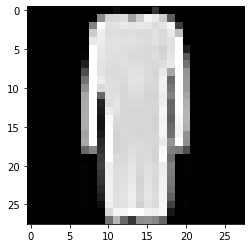

In [4]:
plt.imshow(x_train[25], cmap='gray', interpolation='nearest'), y_train[25]

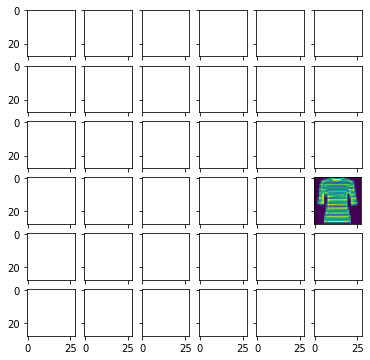

In [5]:
fig, axes=plt.subplots(6, 6, figsize=(6, 6), sharex=True, sharey=True)
ax=axes[3,5]
ax.imshow(x_train[26])

In [3]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import backend

In [4]:
if backend.image_data_format()=='channels_first':
  x_train=x_train.reshape(x_train.shape[0], 1, 28, 28)
  x_test=x_test.reshape(x_test.shape[0], 1 ,28, 28)
  input_shape=(1, 28, 28)
else:
  x_train=x_train.reshape(x_train.shape[0], 28, 28, 1)
  x_test=x_test.reshape(x_test.shape[0], 28, 28, 1)
  input_shape=(28, 28, 1)
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train/=255
x_test/=255

In [5]:
display(y_train.shape,y_test.shape)
y_train= tensorflow.keras.utils.to_categorical(y_train, 10)
y_test=tensorflow.keras.utils.to_categorical(y_test, 10)
print('after')
display(y_train.shape,y_test.shape)

(60000,)

(10000,)

after


(60000, 10)

(10000, 10)

In [9]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
import tensorflow as tf
import time

start_time = time.time()
model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=2, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
elapsed_time=time.time()-start_time
elapsed_time

Epoch 1/12
469/469 - 10s - loss: 0.5222 - accuracy: 0.8164 - val_loss: 0.3350 - val_accuracy: 0.8817
Epoch 2/12
469/469 - 3s - loss: 0.3413 - accuracy: 0.8774 - val_loss: 0.2809 - val_accuracy: 0.8963
Epoch 3/12
469/469 - 3s - loss: 0.2944 - accuracy: 0.8932 - val_loss: 0.2656 - val_accuracy: 0.9025
Epoch 4/12
469/469 - 3s - loss: 0.2625 - accuracy: 0.9052 - val_loss: 0.2427 - val_accuracy: 0.9100
Epoch 5/12
469/469 - 3s - loss: 0.2379 - accuracy: 0.9121 - val_loss: 0.2361 - val_accuracy: 0.9148
Epoch 6/12
469/469 - 3s - loss: 0.2182 - accuracy: 0.9197 - val_loss: 0.2241 - val_accuracy: 0.9177
Epoch 7/12
469/469 - 3s - loss: 0.2026 - accuracy: 0.9258 - val_loss: 0.2315 - val_accuracy: 0.9160
Epoch 8/12
469/469 - 3s - loss: 0.1878 - accuracy: 0.9309 - val_loss: 0.2194 - val_accuracy: 0.9217
Epoch 9/12
469/469 - 3s - loss: 0.1762 - accuracy: 0.9346 - val_loss: 0.2138 - val_accuracy: 0.9240
Epoch 10/12
469/469 - 3s - loss: 0.1649 - accuracy: 0.9387 - val_loss: 0.2171 - val_accuracy: 0.924

43.37126326560974

In [13]:
import numpy as np
np.argmax(model.predict(x_test)[25])

6